## Take any dataset, find SINDY representation in Matlab /Python.

In [2]:
import numpy as np

# Create a synthetic dataset for a 2D dynamical system
t = np.linspace(0, 10, 100)  # Time points
dt = t[1] - t[0]  # Time step

# Simulate the dynamical system (example equations)
x = np.sin(2 * np.pi * t)
y = np.cos(2 * np.pi * t)

# Stack the data into a 2D array
data = np.column_stack((x, y))
data

array([[ 0.00000000e+00,  1.00000000e+00],
       [ 5.92907929e-01,  8.05270258e-01],
       [ 9.54902241e-01,  2.96920375e-01],
       [ 9.45000819e-01, -3.27067963e-01],
       [ 5.67059864e-01, -8.23676581e-01],
       [-3.17279335e-02, -9.99496542e-01],
       [-6.18158986e-01, -7.86053095e-01],
       [-9.63842159e-01, -2.66473814e-01],
       [-9.34147860e-01,  3.56886222e-01],
       [-5.40640817e-01,  8.41253533e-01],
       [ 6.34239197e-02,  9.97986676e-01],
       [ 6.42787610e-01,  7.66044443e-01],
       [ 9.71811568e-01,  2.35758936e-01],
       [ 9.22354294e-01, -3.86345126e-01],
       [ 5.13677392e-01, -8.57983413e-01],
       [-9.50560433e-02, -9.95471923e-01],
       [-6.66769001e-01, -7.45264450e-01],
       [-9.78802446e-01, -2.04806668e-01],
       [-9.09631995e-01,  4.15415013e-01],
       [-4.86196736e-01,  8.73849377e-01],
       [ 1.26592454e-01,  9.91954813e-01],
       [ 6.90079011e-01,  7.23734038e-01],
       [ 9.84807753e-01,  1.73648178e-01],
       [ 8.

In [4]:
pip install pysindy


                                              0.0/121.0 kB ? eta -:--:--
     ---                                      10.2/121.0 kB ? eta -:--:--
     ------                                20.5/121.0 kB 320.0 kB/s eta 0:00:01
     ---------                             30.7/121.0 kB 217.9 kB/s eta 0:00:01
     ------------                          41.0/121.0 kB 217.9 kB/s eta 0:00:01
     ------------                          41.0/121.0 kB 217.9 kB/s eta 0:00:01
     ----------------------------          92.2/121.0 kB 374.1 kB/s eta 0:00:01
     ------------------------------------ 121.0/121.0 kB 416.5 kB/s eta 0:00:00
                                              0.0/34.6 MB ? eta -:--:--
                                              0.0/34.6 MB ? eta -:--:--
                                              0.1/34.6 MB 8.3 MB/s eta 0:00:05
                                              0.3/34.6 MB 3.4 MB/s eta 0:00:11
                                              0.3/34.6 MB 2.3 MB/s eta 

In [5]:
from pysindy import SINDy

# Initialize the SINDy model
model = SINDy(feature_names=['x', 'y'])

# Fit the model to the data
model.fit(data, t=dt)

# Get the identified equations
equations = model.print()
print(equations)


(x)' = 5.915 y
(y)' = -5.870 x
None


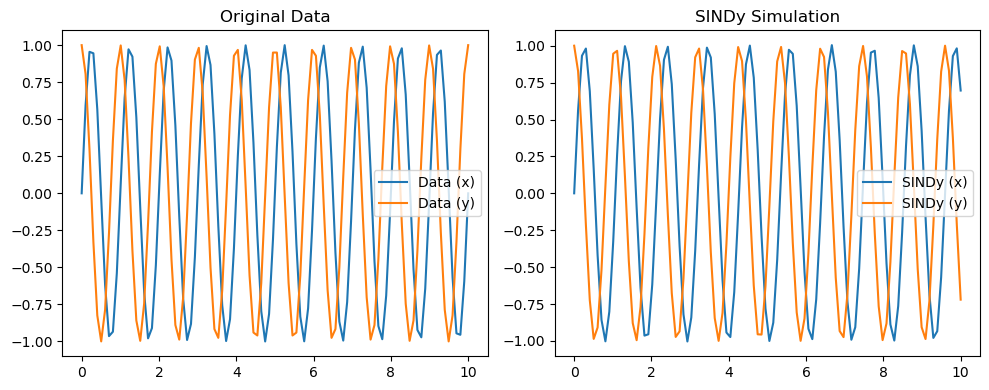

In [6]:
import matplotlib.pyplot as plt

# Simulate the system using the identified equations
simulated_data = model.simulate(data[0], t)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(t, data[:, 0], label='Data (x)')
plt.plot(t, data[:, 1], label='Data (y)')
plt.title('Original Data')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t, simulated_data[:, 0], label='SINDy (x)')
plt.plot(t, simulated_data[:, 1], label='SINDy (y)')
plt.title('SINDy Simulation')
plt.legend()

plt.tight_layout()
plt.show()
